C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_48308\4102993982.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='요일유형', y='매출수량', estimator=np.mean, ci=None, palette='pastel')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_48308\4102993982.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='요일유형', y='매출수량', estimator=np.mean, ci=None, palette='pastel')


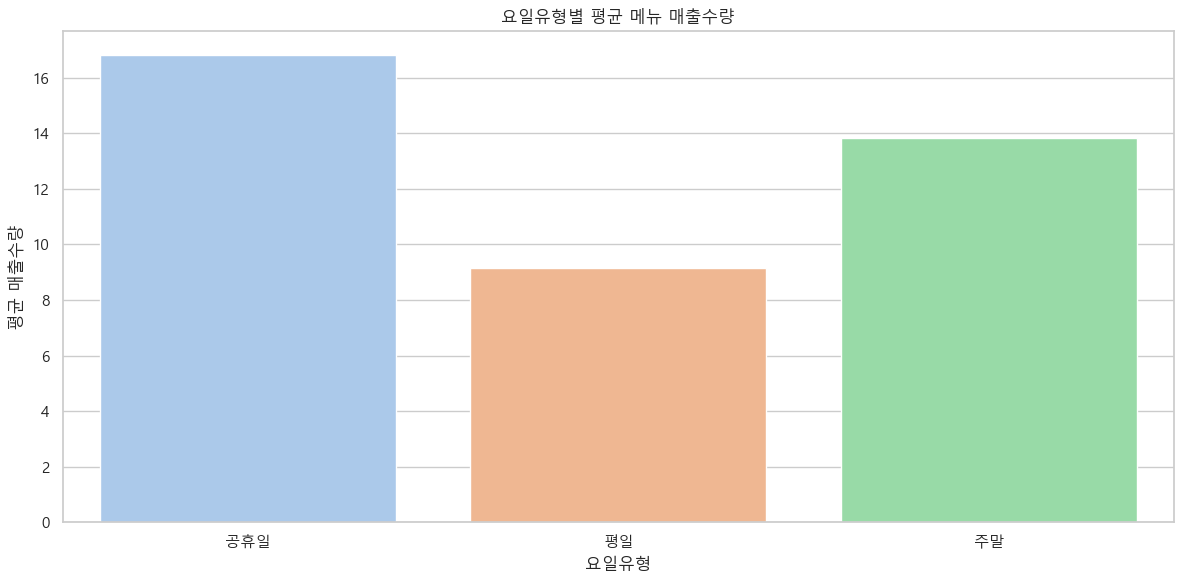

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_48308\4102993982.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_variable_menus, x='변동계수', y='메뉴명', palette='Blues_r')


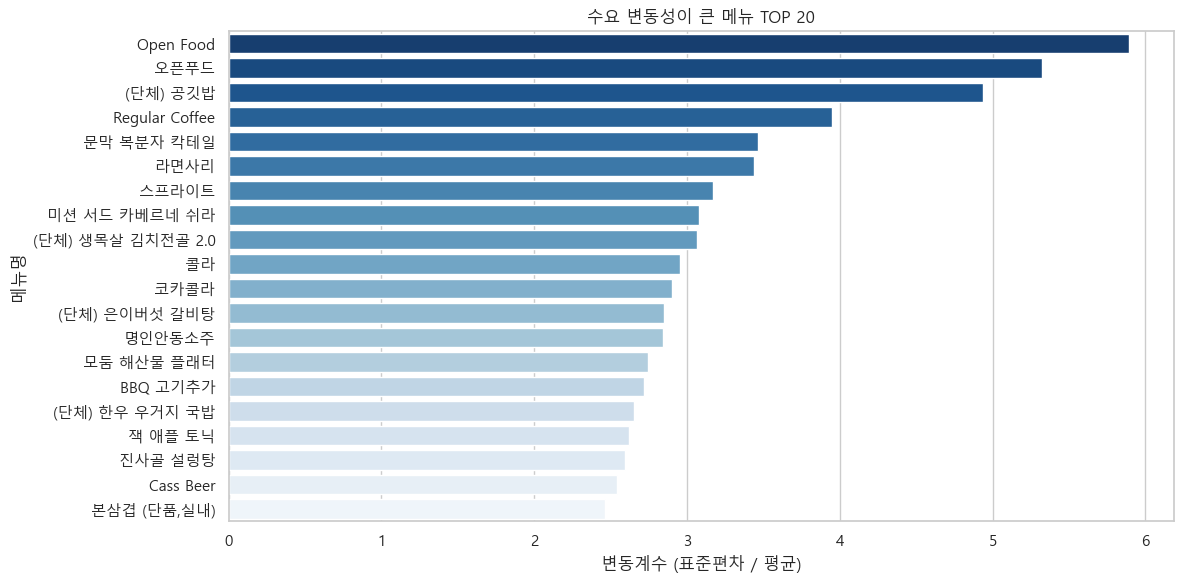

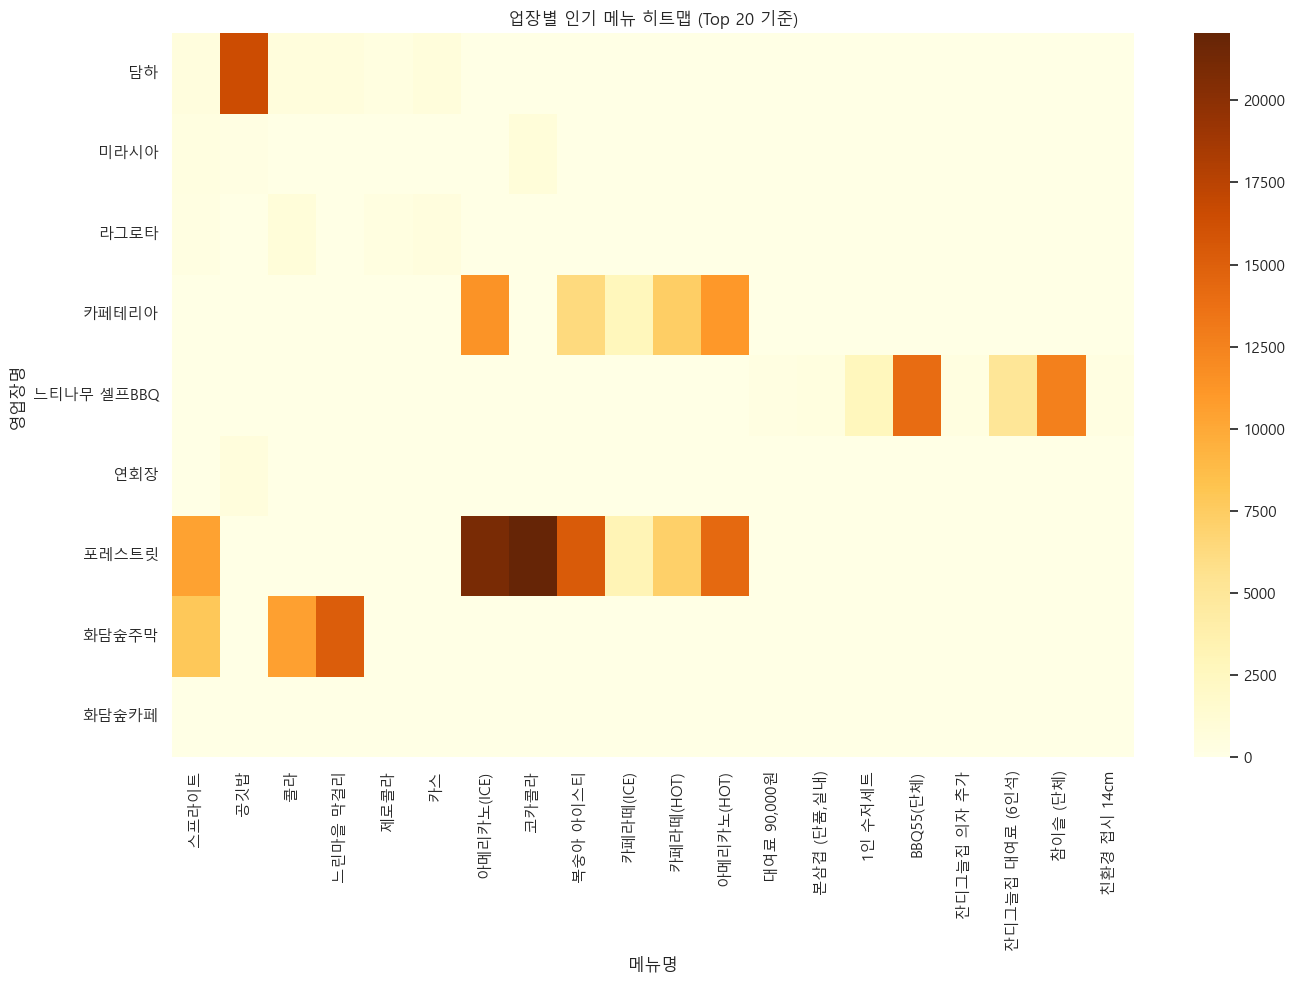

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_48308\4102993982.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_menus, x='매출수량', y='메뉴명', palette='Reds_r')


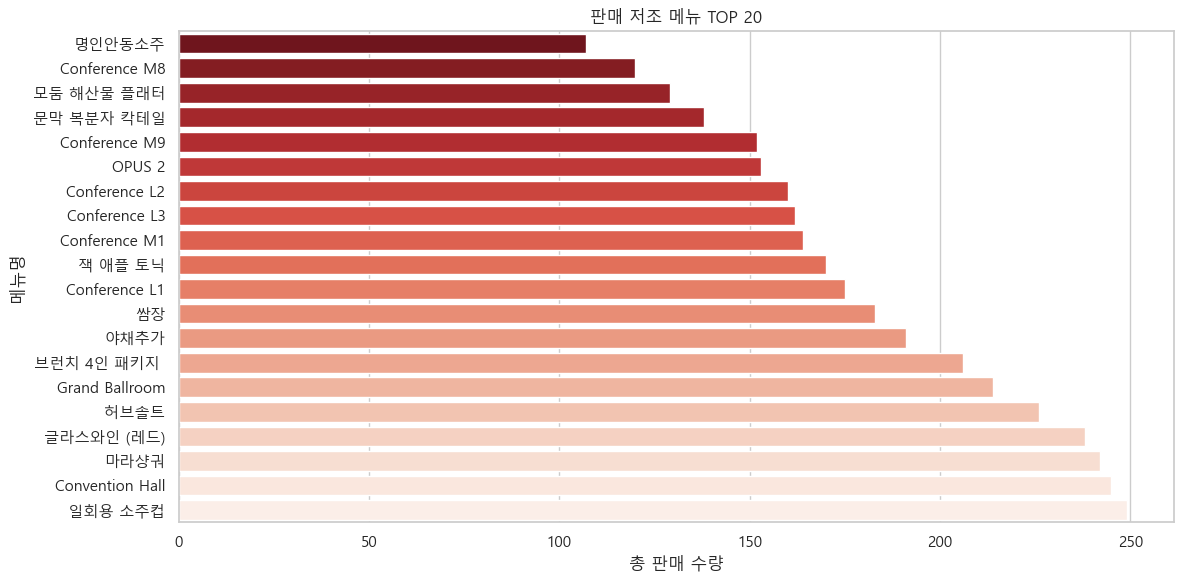

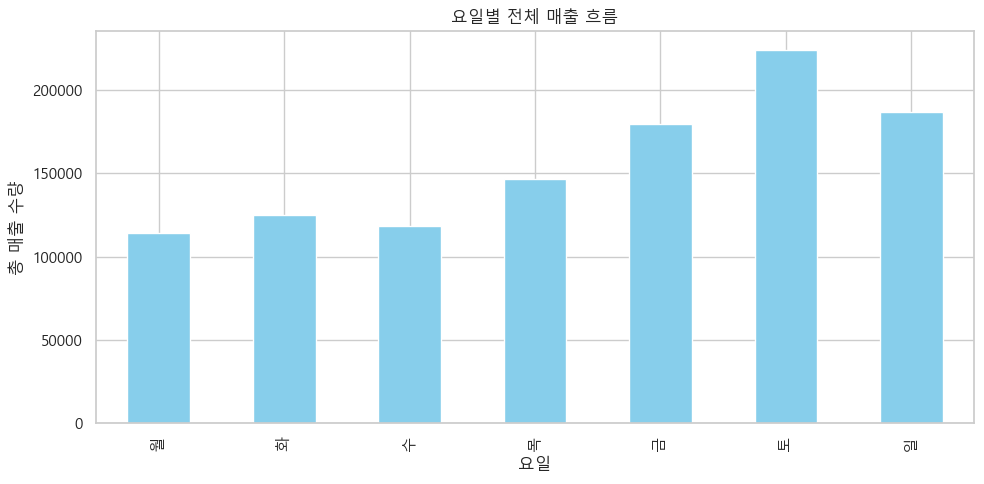

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 요일 유형 정의
def 요일유형(row):
    if row['공휴일여부'] == 1:
        return '공휴일'
    elif row['요일'] in ['토', '일']:
        return '주말'
    else:
        return '평일'

df['요일유형'] = df.apply(요일유형, axis=1)

# ✅ 1. 요일유형별 메뉴 수요 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='요일유형', y='매출수량', estimator=np.mean, ci=None, palette='pastel')
plt.title('요일유형별 평균 메뉴 매출수량')
plt.ylabel('평균 매출수량')
plt.xlabel('요일유형')
plt.tight_layout()
plt.show()

# ✅ 2. 메뉴별 수요 변동성 분석
menu_stats = df.groupby('메뉴명')['매출수량'].agg(['mean', 'std', 'count']).reset_index()
menu_stats['변동계수'] = menu_stats['std'] / menu_stats['mean']
menu_stats_filtered = menu_stats[(menu_stats['count'] > 50) & (menu_stats['mean'] > 0)]
top_variable_menus = menu_stats_filtered.sort_values('변동계수', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_variable_menus, x='변동계수', y='메뉴명', palette='Blues_r')
plt.title('수요 변동성이 큰 메뉴 TOP 20')
plt.xlabel('변동계수 (표준편차 / 평균)')
plt.ylabel('메뉴명')
plt.tight_layout()
plt.show()

# ✅ 3. 업장별 인기 메뉴 히트맵
pivot_table = df.pivot_table(index='영업장명', columns='메뉴명', values='매출수량', aggfunc='sum', fill_value=0)
top_업장 = df['영업장명'].value_counts().head(20).index
top_메뉴 = df['메뉴명'].value_counts().head(20).index
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table.loc[top_업장, top_메뉴], cmap='YlOrBr')
plt.title('업장별 인기 메뉴 히트맵 (Top 20 기준)')
plt.xlabel('메뉴명')
plt.ylabel('영업장명')
plt.tight_layout()
plt.show()

# ✅ 4. 판매 저조 메뉴 분석 (총 판매수량 기준 하위 20)
menu_total_sales = df.groupby('메뉴명')['매출수량'].sum().reset_index()
bottom_menus = menu_total_sales.sort_values('매출수량').head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_menus, x='매출수량', y='메뉴명', palette='Reds_r')
plt.title('판매 저조 메뉴 TOP 20')
plt.xlabel('총 판매 수량')
plt.ylabel('메뉴명')
plt.tight_layout()
plt.show()

# ✅ 5. 요일별 전체 매출 흐름 (피크 탐색)
요일별_매출 = df.groupby('요일')['매출수량'].sum().reindex(['월','화','수','목','금','토','일'])

plt.figure(figsize=(10, 5))
요일별_매출.plot(kind='bar', color='skyblue')
plt.title('요일별 전체 매출 흐름')
plt.ylabel('총 매출 수량')
plt.xlabel('요일')
plt.tight_layout()
plt.show()
